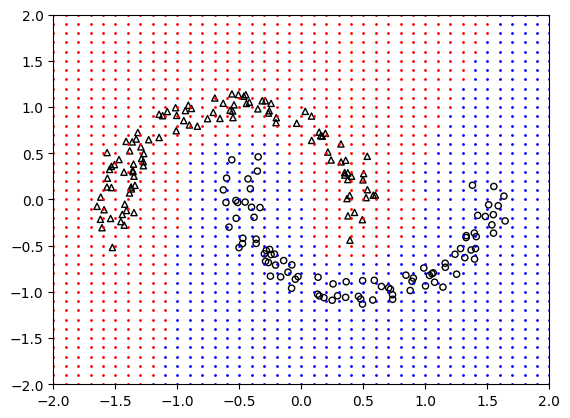

In [116]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def load_data(file_path):
    data = pd.read_csv(file_path, sep="\s+", header=None)
    data.columns = ["x1", "x2", "y"]
    return data

def test_data():
    test_data = []
    for i in range (-20, 21):
        for j in range (-20, 21):
            test_data.append([i/10, j/10])
    return test_data

def euclidean_distance(p1, p2):
    p1x1, p1x2 = p1
    p2x1, p2x2 = p2
    return math.sqrt((p2x1 - p1x1)**2 + (p2x2 - p1x2)**2)

class NN:
    def __init__(self, numK=1):
        # x1, x2, y, ed
        self.nnOrder = []
        self.numK = numK

    def add(self, value):
        for i in range(self.numK):
            if not self.nnOrder or value[-1] < self.nnOrder[i][-1]:
                self.nnOrder.insert(i, value)
            else:
                continue
                
def knn(sample, training_data, num=1):
    nn = NN(num)
    for i, row in training_data.iterrows():
        ed = np.linalg.norm(np.array(sample) - np.array(row[:-1]))
        if  not nn.nnOrder or ed < nn.nnOrder[num-1][-1]:
            nn.add([row, ed])
    
    class_zero = [0, 0]
    class_one = [0, 0]
    for i in range (num):
        if nn.nnOrder[i][0].iloc[-1] == 0:
            class_zero[0] +=1
            class_zero[1] += nn.nnOrder[i][-1]
        else:
            class_one[0] += 1
            class_one[1] += nn.nnOrder[i][-1]
        
    # print(class_one)
    # print(class_zero)

    if class_one[0] > class_zero[0]:
        return 1
    elif class_zero[0] > class_one[0]:
        return 0
    else:
        if class_one[1] > class_zero[1]:
            return 1
        else:
            return 0

# Question # 2
training_data = load_data("D2z.txt") 
test_data = test_data()
k_num = 1

test_results = []
for val in test_data:
    result = [val[0], val[1], knn(val, training_data, k_num)]
    test_results.append(result) 

test_result_data = pd.DataFrame(test_results, columns=["x1", "x2", "y"])

training_ones = training_data[training_data["y"] == 1]
training_zeros = training_data[training_data["y"] == 0]

test_ones = test_result_data[test_result_data["y"] == 1]
test_zeros = test_result_data[test_result_data["y"] == 0]

plt.xlim(-2,2)
plt.ylim(-2,2)

plt.scatter(training_ones["x1"], training_ones["x2"], s=20, marker="^", edgecolors="black", facecolors="none")
plt.scatter(training_zeros["x1"], training_zeros["x2"], s=20, marker="o", edgecolors="black", facecolors="none")
plt.scatter(test_ones["x1"], test_ones["x2"], c="red", s=1)
plt.scatter(test_zeros["x1"], test_zeros["x2"], c="blue", s=1)

plt.show()


In [196]:
# Q 2.2
import math
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from prettytable import PrettyTable 

def load_data(file_path):
    data = pd.read_csv(file_path, sep=",")
    return data

def test_data():
    test_data = []
    for i in range (-20, 21):
        for j in range (-20, 21):
            test_data.append([i/10, j/10])
    return test_data

def euclidean_distance(p1, p2):
    p1x1, p1x2 = p1
    p2x1, p2x2 = p2
    return math.sqrt((p2x1 - p1x1)**2 + (p2x2 - p1x2)**2)

class NN:
    def __init__(self, numK=1):
        # x1, x2, y, ed
        self.nnOrder = []
        self.numK = numK

    def add(self, value):
        if not self.nnOrder:
            self.nnOrder.append(value)
        for i in range(min(len(self.nnOrder),self.numK)):
            if value[1] < self.nnOrder[i][1]:
                self.nnOrder.insert(i, value)
                return
            else:
                continue
        if len(self.nnOrder) < self.numK:
            self.nnOrder.insert(len(self.nnOrder), value)
            
            
                
def knn(sample, training_data, num=1):
    nn = NN(num)
    for i, row in training_data.iterrows():
        ed = np.linalg.norm(np.array(sample[1:-1]) - np.array(row[1:-1]))
        if  len(nn.nnOrder) < num or ed < nn.nnOrder[num-1][1]:
            nn.add([row[-1], ed, row[0]])
            # print("adding")
            # print([row[-1], ed, row[0]])
            # print("added")
            # print(nn.nnOrder)
            # print("--------------------------------")

    class_zero = [0, 0]
    class_one = [0, 0]

    for i in range(num):
        if nn.nnOrder[i][0] == 0:
            class_zero[0] +=1
            class_zero[1] += nn.nnOrder[i][1]
        else:
            class_one[0] += 1
            class_one[1] += nn.nnOrder[i][1]
        
    # print(class_one)
    # print(class_zero)

    if class_one[0] > class_zero[0]:
        return 1
    elif class_zero[0] > class_one[0]:
        return 0
    else:
        if class_one[1] > class_zero[1]:
            return 1
        else:
            return 0
        
def get_number_email(email_string):
    return int(re.search(r'\d+', email_string).group())

def get_stats(results):
    count = 0
    correct = 0
    true_positives = 0
    true_negatives = 0
    false_positives = 0
    false_negatives = 0
    for val in results:
        count +=1
        if val[1] == val[2]:
            correct+=1
            if val[1] == 1:
                true_positives+=1
            else:
                true_negatives+=1
        else:
            if val[2] == 0:
                false_negatives+=1
            else:
                false_positives+=1
            
        
    if true_positives + true_negatives + false_negatives + false_positives == count:
        if correct + true_negatives + false_negatives == count:
            print("horayyyyyy!")
    else: 
        print("fix me!!!!")
    
    accuracy = correct / count
    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)
        
    return accuracy, precision, recall

def get_folds(data, start, end):
    test_set = data[(data.iloc[:, 0] >= start) & (data.iloc[:, 0] <= end)]
    training_set = data[~((data.iloc[:, 0] >= start) & (data.iloc[:, 0] <= end))]
    return test_set, training_set
    
# Q2.2
data = load_data("emails.csv")
data["Email No."] = data["Email No."].apply(lambda x: get_number_email(x))

k_num = [1, 3, 5, 7, 10]
# folds = [[1,20], [1000,1020], [2000, 2020], [3000, 3020], [4000, 4020]]
folds = [[1,1000], [1000,2000], [2000, 3000], [3000, 4000], [4000, 5000]]

table = PrettyTable()
table.field_names = ["Fold Name" , "Accuracy" , "Precision" , "Recall"]

k_accuracy = []
for k_val in k_num:
    accuracy_list = []
    for val in folds:
        fold_name = "Emails: " + str(val[0]) + " - " + str(val[1])
        test_set, training_set = get_folds(data, val[0], val[1])
        

        test_results = []
        for index, row in test_set.iterrows():
            result = [row[0], row[-1], knn(row, training_set, k_val)]
            test_results.append(result) 
        
        accuracy, precision, recall = get_stats(test_results)
        accuracy_list.append(accuracy)

        if k_val == 1:
            table.add_row([fold_name, accuracy, precision, recall])
            print(table)
    avg_accuracy = sum(accuracy_list) / len(accuracy_list)
    k_accuracy.append([k_val, avg_accuracy])
    print("accuracy list")
    print(k_accuracy)


# # Fold 4

# data = load_data("emails.csv")
# data["Email No."] = data["Email No."].apply(lambda x: get_number_email(x))
# test_set = data[(data.iloc[:, 0] >= 0) & (data.iloc[:, 0] <= 1000)]
# training_set = data[~((data.iloc[:, 0] >= 0) & (data.iloc[:, 0] <= 1000))]
# k_num = 10
# test_results = []
# for index, row in test_set.iterrows():
#     result = [row[0], row[-1], knn(row, training_set, k_num)]
#     test_results.append(result) 






/var/folders/2d/67h5qq7x0bqfh_pl2s2_r46h0000gn/T/ipykernel_92080/2120673794.py:144: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  result = [row[0], row[-1], knn(row, training_set, k_val)]
/var/folders/2d/67h5qq7x0bqfh_pl2s2_r46h0000gn/T/ipykernel_92080/2120673794.py:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  nn.add([row[-1], ed, row[0]])


+------------------+----------+--------------------+--------------------+
|    Fold Name     | Accuracy |     Precision      |       Recall       |
+------------------+----------+--------------------+--------------------+
| Emails: 1 - 1000 |  0.825   | 0.6544943820224719 | 0.8175438596491228 |
+------------------+----------+--------------------+--------------------+
+---------------------+--------------------+--------------------+--------------------+
|      Fold Name      |      Accuracy      |     Precision      |       Recall       |
+---------------------+--------------------+--------------------+--------------------+
|   Emails: 1 - 1000  |       0.825        | 0.6544943820224719 | 0.8175438596491228 |
| Emails: 1000 - 2000 | 0.8521478521478522 | 0.6837606837606838 | 0.8664259927797834 |
+---------------------+--------------------+--------------------+--------------------+
+---------------------+--------------------+--------------------+--------------------+
|      Fold Name     